In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Model
from keras.layers import Input
from keras.layers import Embedding
from keras.layers.merge import add
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import to_categorical


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
group_data=pd.read_csv('data_showerPlane.csv')
df=pd.read_csv('data_showerPlane.csv')

In [3]:
E = group_data.sdEnergy.unique()
lgE = np.log10(E)
lgEmin = 18.4
lgEmax = 20.1
dlgE = 0.1

lgECenters = np.arange(lgEmin + dlgE/2., lgEmax, dlgE)
ECenters = 10.**lgECenters
Counts = np.zeros(len(lgECenters))
c=np.zeros(len(lgE))

for i in range(0, len(lgE)):
    thisLgE = lgE[i]
    ibin = int((thisLgE - lgEmin)/dlgE)
    print(ibin)
    if(thisLgE < lgEmin or thisLgE > lgEmax):
        print ("Event energy out of range: lgE =", thisLgE)
        sys.exit()

    Counts[ibin] +=1
    c[i]=ibin

5
0
5
9
5
2
9
0
3
1
2
2
3
6
0
2
3
0
4
3
3
3
5
4
2
3
2
4
1
1
7
1
5
1
1
9
1
8
1
1
1
2
2
1
3
4
0
1
5
1
8
2
4
2
4
4
4
1
3
7
2
5
0
6
9
4
0
4
3
4
1
10
1
2
2
1
1
1
2
6
1
4
0
1
1
5
2
1
7
1
3
1
1
5
8
2
1
6
4
2
2
2
0
6
1
1
3
1
0
2
6
2
1
1
0
3
0
4
1
2
2
3
2
2
1
5
6
3
5
1
2
3
2
1
3
5
7
1
2
2
1
3
5
1
5
2
1
7
2
1
1
1
6
3
6
2
4
1
1
4
10
2
1
0
5
7
3
0
1
8
3
5
6
2
5
1
10
2
6
1
0
2
0
6
1
5
1
1
2
6
3
4
5
4
3
1
1
8
0
2
4
4
6
0
2
1
5
1
1
3
3
5
9
1
3
14
4
1
3
3
1
7
0
8
2
2
2
4
0
1
1
2
1
4
2
1
4
2
6
10
0
5
1
1
2
9
5
1
2
2
2
1
11
1
2
5
2
1
8
1
5
3
2
3
1
1
2
2
3
5
3
1
1
1
3
1
3
9
0
5
1
2
4
1
2
9
2
3
3
4
12
4
4
5
13
1
1
3
2
2
3
3
1
8
5
3
0
1
1
3
3
3
0
2
4
3
1
7
9
0
4
1
2
2
1
1
7
2
1
2
0
1
1
1
7
10
1
0
1
13
0
4
5
3
1
8
3
1
1
6
0
5
0
1
1
1
7
3
4
0
1
0
2
1
9
1
6
1
4
9
6
2
8
2
4
3
2
1
5
1
1
3
6
2
1
0
1
4
4
2
2
5
1
2
1
9
0
6
0
6
1
5
3
5
1
6
2
2
6
8
3
1
3
9
1
1
3
0
3
1
3
0
1
9
1
1
6
1
3
1
4
7
3
3
7
3
1
1
1
1
1
1
3
1
8
1
2
1
1
1
2
5
1
2
1
3
4
2
1
2
1
9
2
0
0
2
1
2
2
0
6
1
3
4
2
1
2
1
3
5
1
3
0
6
2
3
5
2
7
4
7
1
2
6
2


1
10
1
2
2
3
3
2
1
2
7
3
1
7
5
0
0
1
3
1
3
9
1
0
1
5
1
4
5
1
1
3
12
6
3
5
0
0
1
2
7
2
2
5
1
3
1
2
1
5
5
4
3
2
1
9
1
2
2
4
2
4
6
3
10
2
12
6
1
2
4
1
0
2
5
1
1
0
1
0
1
2
1
1
1
1
1
1
3
4
1
4
1
0
3
10
2
2
1
1
5
6
0
2
2
1
0
2
1
4
4
4
4
0
1
1
11
1
2
3
4
2
1
2
6
1
6
2
2
4
1
0
4
2
6
6
4
1
3
6
6
4
4
6
3
1
1
1
9
2
3
5
10
3
1
2
8
1
6
5
6
10
0
1
8
0
1
1
4
8
3
2
0
2
5
1
1
1
2
3
7
1
0
0
2
6
7
5
4
2
6
1
5
2
0
1
7
1
1
1
6
2
4
3
3
8
4
1
6
5
2
3
1
2
2
1
1
0
2
0
2
2
0
9
4
2
2
2
1
3
1
3
3
4
2
8
3
5
1
1
1
0
3
1
2
1
4
1
5
1
3
5
1
3
3
8
3
0
6
2
2
4
8
1
1
6
1
1
1
3
2
3
7
6
3
2
1
3
1
3
2
0
7
1
5
1
6
1
1
2
4
1
1
1
6
1
5
1
4
11
3
1
5
1
1
1
3
2
5
1
2
1
2
1
6
6
8
1
0
3
1
2
6
5
1
0
2
11
2
3
3
5
1
5
3
6
5
0
2
2
1
1
6
2
2
1
7
8
2
4
3
4
2
7
4
2
12
2
1
2
0
2
5
2
1
3
0
3
2
5
12
1
2
1
3
4
4
4
1
0
1
1
3
2
1
0
1
0
4
7
3
4
1
1
1
5
3
6
2
3
1
3
5
0
1
2
6
5
2
1
2
8
8
1
1
5
10
4
1
1
1
1
1
2
1
2
7
7
3
9
4
4
7
1
1
4
2
2
4
3
3
4
1
4
4
5
1
5
1
0
4
1
1
12
3
2
2
1
0
4
4
12
5
2
1
3
1
3
2
0
0
1
3
3
4
3
7
3
1
3
5
1
0
0
4
3
4
0
1
3
1
3
1

In [4]:
lgECenters

array([18.45, 18.55, 18.65, 18.75, 18.85, 18.95, 19.05, 19.15, 19.25,
       19.35, 19.45, 19.55, 19.65, 19.75, 19.85, 19.95, 20.05])

In [5]:
Counts

array([6.570e+02, 2.144e+03, 1.288e+03, 9.860e+02, 6.920e+02, 5.090e+02,
       3.960e+02, 2.690e+02, 1.620e+02, 1.300e+02, 7.700e+01, 4.100e+01,
       3.300e+01, 9.000e+00, 6.000e+00, 0.000e+00, 2.000e+00])

In [6]:
c

array([5., 0., 5., ..., 1., 8., 1.])

In [7]:
id1=[]
train_count=[]
test_count=[]
val_count=[]
train=pd.DataFrame()
test=pd.DataFrame()
val=pd.DataFrame()
for j in range(len(c)):
    if c[j]==1:
        id1.append(df.eventId.unique()[j])
train_id,temp=train_test_split(id1, test_size=0.4, random_state=42)
val_id,test_id=train_test_split(temp, test_size=0.5, random_state=42)

train_temp = group_data.loc[group_data['eventId'].isin(train_id)]
test_temp = group_data.loc[group_data['eventId'].isin(test_id)]
val_temp = group_data.loc[group_data['eventId'].isin(val_id)]

train=train.append(train_temp,ignore_index=True)
test=test.append(test_temp,ignore_index=True)
val=val.append(val_temp,ignore_index=True)
        
train_count.append(train_temp.shape[0])
test_count.append(test_temp.shape[0])
val_count.append(val_temp.shape[0])        

print('training data count',sum(train_count))
print('testing data count',sum(test_count))
print('validation data count',sum(val_count))
print('train data',train.shape)
print('test data',test.shape)
print('val data',val.shape)
print(sum(train_count)+sum(test_count)+sum(val_count))   

#assert (sum(train_count)+sum(test_count)+sum(val_count))==group_data.shape[0]
train_count = pd.DataFrame(train_count)

test_count = pd.DataFrame(test_count)


val_count = pd.DataFrame(val_count)


df_train=train.drop(columns=[ 'eventId', 'sId', 'sPMT','sTimeSec', 'sTimeNsec',
       'sSignalStart', 'sSignalEnd','fdXmaxErr','sVEM','sStatus','sXrel','sYrel','sZrel'])
df_test=test.drop(columns=['eventId', 'sId', 'sPMT','sTimeSec', 'sTimeNsec',
       'sSignalStart', 'sSignalEnd','fdXmaxErr','sVEM','sStatus','sXrel','sYrel','sZrel'])
df_val=val.drop(columns=['eventId', 'sId', 'sPMT','sTimeSec', 'sTimeNsec',
       'sSignalStart', 'sSignalEnd','fdXmaxErr','sVEM','sStatus','sXrel','sYrel','sZrel'])
df.shape



training data count 1286
testing data count 429
validation data count 429
train data (1286, 20695)
test data (429, 20695)
val data (429, 20695)
2144


(7401, 20695)

In [8]:
y_train=np.array(df_train['fdXmax'].to_list())
y_train=np.reshape(y_train, (-1,1))
X_train=df_train.drop(columns=['fdXmax'])

y_test=np.array(df_test['fdXmax'].to_list())
y_test=np.reshape(y_test, (-1,1))
X_test=df_test.drop(columns=['fdXmax'])

y_val=np.array(df_val['fdXmax'].to_list())
y_val=np.reshape(y_val, (-1,1))
X_val=df_val.drop(columns=['fdXmax'])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train1=X_train.iloc[: ,0:17].copy()
X_train2=X_train.iloc[: ,17:].copy()
X_test1=X_test.iloc[: ,0:17].copy()
X_test2=X_test.iloc[: ,17:].copy()
X_val1=X_val.iloc[: ,0:17].copy()
X_val2=X_val.iloc[: ,17:].copy()

In [10]:
X_train1

sdEnergy   sdEnergyErr  sdZenith  sdZenithErr  sdAzimuth  \
0     3.429966e+18  2.608746e+17  0.422846     0.007719   3.107456   
1     3.831710e+18  5.025431e+17  0.881998     0.007874   2.404411   
2     3.976791e+18  3.214313e+17  0.676165     0.007730   1.187381   
3     3.956011e+18  5.391595e+17  0.923529     0.006707   2.987737   
4     3.309405e+18  4.446220e+17  0.695591     0.013628   3.213337   
...            ...           ...       ...          ...        ...   
1281  3.324892e+18  2.789085e+17  0.099351     0.009305   0.477089   
1282  3.429605e+18  3.310964e+17  0.465751     0.008423   1.035368   
1283  3.347963e+18  3.473477e+17  0.896387     0.006675   0.541488   
1284  3.825195e+18  3.763840e+17  0.786380     0.008333   3.490445   
1285  3.444414e+18  5.251621e+17  0.356178     0.011880   0.521580   

      sdAzimuthErr        sdXpos        sdYpos     sdZpos    sdS1000  \
0         0.015074 -27447.902157   7747.407036  56.402122  18.205976   
1         0.008798 -12485.966049  27657.383048   3.093142  13.997213   
2         0.015007 -17458.360724  22298.481131  12.396335  18.915850   
3         0.014808   6414.469241 -20326.536593 -58.535970  13.173836   
4         0.020645  -2795.903938  -1882.294896   1.329136  15.302383   
...            ...           ...           ...        ...        ...   
1281      0.089818 -25737.857728  21676.162996  62.903897  16.509080   
1282      0.033463 -19035.481706   6226.590212  29.977430  17.442887   
1283      0.006199 -17598.675343  23222.936919   6.293901  11.876210   
1284      0.010310   4443.043203 -13463.308395 -35.121624  15.811040   
1285      0.042407 -20783.460176   2822.558163  26.056359  18.055364   

      sdS1000Err       sdRopt  sdRoptErr    sdBeta  sdBetaErr   sdGamma  \
0       1.342943   878.325964        0.0 -2.301237        0.0  0.024408   
1       1.780425  1091.334730        0.0 -1.886925        0.0  0.111230   
2       1.482800   867.789926        0.0 -2.138042        0.0 -0.002400   
3       1.741299  1158.833103        0.0 -1.821528        0.0  0.094565   
4       1.993892  1082.818646        0.0 -2.107776        0.0  0.003155   
...          ...          ...        ...       ...        ...       ...   
1281    1.343100   916.854181        0.0 -2.383575        0.0  0.024980   
1282    1.633165   904.972495        0.0 -2.277777        0.0  0.021371   
1283    1.194987   854.295548        0.0 -1.852574        0.0  0.110971   
1284    1.508827   871.966611        0.0 -2.016931        0.0  0.061627   
1285    2.669843  1098.780291        0.0 -2.328630        0.0  0.027687   

      sdGammaErr  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
...          ...  
1281         0.0  
1282         0.0  
1283         0.0  
1284         0.0  
1285         0.0  

[1286 rows x 17 columns]

In [11]:
X_train.columns

Index(['sdEnergy', 'sdEnergyErr', 'sdZenith', 'sdZenithErr', 'sdAzimuth',
       'sdAzimuthErr', 'sdXpos', 'sdYpos', 'sdZpos', 'sdS1000',
       ...
       '20654', '20655', '20656', '20657', '20658', '20659', '20660', '20661',
       '20662', '20663'],
      dtype='object', length=20681)

In [12]:
#y_train=np.array(df_train['fdXmax'].to_list())
#y_train=np.reshape(y_train, (-1,1))

In [13]:

#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1)


In [14]:
y_train.shape[0]

1286

In [15]:
scaler_x1 = MinMaxScaler()
scaler_x2 = MinMaxScaler()
scaler_y = MinMaxScaler()

fit_X1=scaler_x1.fit(X_train1)
X_train1=fit_X1.transform(X_train1)
X_test1=fit_X1.transform(X_test1)
X_val1=fit_X1.transform(X_val1)

fit_X2=scaler_x2.fit(X_train2)
X_train2=fit_X2.transform(X_train2)
X_test2=fit_X2.transform(X_test2)
X_val2=fit_X2.transform(X_val2)

fit_y=scaler_y.fit(y_train)
y_train=fit_y.transform(y_train)
y_test=fit_y.transform(y_test)
y_val=fit_y.transform(y_val)

In [16]:
X_train1.shape

(1286, 17)

In [17]:
X_train2.shape

(1286, 20664)

In [18]:
X_train2.shape[0]

1286

In [19]:
maxTanks = 24
maxBins = 861
X_train2=X_train2.reshape(X_train2.shape[0],maxTanks, maxBins,1)
X_val2=X_val2.reshape(X_val2.shape[0],maxTanks, maxBins,1)
X_test2=X_test2.reshape(X_test2.shape[0],maxTanks, maxBins,1)

In [20]:
X_train2.shape

(1286, 24, 861, 1)

In [21]:
import numpy as np
#from keras.layers import LSTM
np.random.seed(1337)

inputs1 = Input(shape=(X_train1.shape[1],))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(inputs1)

#model = Sequential()
#model.add(Dense(10, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
#model.add(Dense(300, kernel_initializer='normal', activation='relu'))
#model.add(Dense(100, kernel_initializer='normal', activation='relu'))
#model.add(Dense(30, kernel_initializer='normal', activation='relu'))
model = Sequential()
inputs2 = Input(shape = (maxTanks, maxBins,1)) 
conv1 = Conv2D(64, kernel_size = (3,3), strides = (1,1), activation = 'relu')(inputs2) 
max1 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv1) 
conv2 = Conv2D(128, (3,3), activation = 'relu')(max1) 
max2 = MaxPooling2D(pool_size=(2,2))(conv2) 
flat = Flatten()(max2) 
den1 = Dense(100, activation = 'relu')(flat) 
den2 = Dense(256, activation ='relu')(den1) 
  


decoder1 = add([fe2, den2])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(1, activation='sigmoid')(decoder2)
# merge the two input models
model = Model(inputs=[inputs1, inputs2], outputs=outputs)


#model = Sequential()
#model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(Dropout(0.2))
#model.add(Dense(1))


model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 24, 861, 1)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 22, 859, 64)  640         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 11, 429, 64)  0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 9, 427, 128)  73856       max_pooling2d_1[0][0]            
____________________________________________________________________________________________

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse','mae','accuracy'])

In [23]:
history=model.fit([X_train1, X_train2], y_train, epochs=50, verbose=2,  validation_data=([X_val1, X_val2], y_val),shuffle=False)

Train on 1286 samples, validate on 429 samples
Epoch 1/50
 - 100s - loss: 0.6633 - mse: 0.0174 - mae: 0.0995 - accuracy: 7.7760e-04 - val_loss: 0.6574 - val_mse: 0.0138 - val_mae: 0.0930 - val_accuracy: 0.0000e+00
Epoch 2/50
 - 106s - loss: 0.6523 - mse: 0.0143 - mae: 0.0916 - accuracy: 7.7760e-04 - val_loss: 0.6557 - val_mse: 0.0130 - val_mae: 0.0881 - val_accuracy: 0.0000e+00
Epoch 3/50
 - 146s - loss: 0.6515 - mse: 0.0139 - mae: 0.0905 - accuracy: 7.7760e-04 - val_loss: 0.6555 - val_mse: 0.0129 - val_mae: 0.0880 - val_accuracy: 0.0000e+00
Epoch 4/50
 - 107s - loss: 0.6512 - mse: 0.0138 - mae: 0.0899 - accuracy: 7.7760e-04 - val_loss: 0.6554 - val_mse: 0.0129 - val_mae: 0.0881 - val_accuracy: 0.0000e+00
Epoch 5/50
 - 121s - loss: 0.6510 - mse: 0.0137 - mae: 0.0896 - accuracy: 7.7760e-04 - val_loss: 0.6551 - val_mse: 0.0127 - val_mae: 0.0871 - val_accuracy: 0.0000e+00
Epoch 6/50
 - 100s - loss: 0.6507 - mse: 0.0135 - mae: 0.0890 - accuracy: 7.7760e-04 - val_loss: 0.6549 - val_mse: 0.0

Epoch 50/50
 - 108s - loss: 0.6373 - mse: 0.0073 - mae: 0.0640 - accuracy: 0.0016 - val_loss: 0.6684 - val_mse: 0.0163 - val_mae: 0.0999 - val_accuracy: 0.0000e+00


In [26]:
weights = model.get_weights()

In [27]:
weights

[array([[[[ 6.17171116e-02, -1.90651719e-03, -1.17835321e-01,
            9.71945897e-02,  1.25020202e-02,  1.00095682e-01,
            1.06785700e-01,  7.14582950e-02, -1.60630316e-01,
           -1.50865927e-01, -7.59544596e-02, -1.37115464e-01,
            1.04659751e-01, -1.45336576e-02, -6.67517260e-02,
           -2.74483562e-01,  1.24582708e-01,  5.12516163e-02,
           -8.76137540e-02,  6.15669265e-02, -1.49994507e-01,
           -9.54340473e-02,  4.11070585e-02, -1.66351840e-01,
           -1.16897941e-01,  7.49871507e-02, -6.10203519e-02,
           -9.86666419e-03, -8.14319775e-02, -6.22927286e-02,
            1.34436056e-01, -8.04435983e-02,  7.39158317e-02,
            5.08886166e-02,  6.43321425e-02,  4.51655351e-02,
            3.72604956e-03,  3.33233029e-02, -1.81546006e-02,
           -5.23565896e-02,  3.41254771e-02,  7.40276650e-02,
           -5.95146529e-02,  6.28679916e-02, -1.70477599e-01,
           -7.21752876e-03,  2.07246356e-02, -7.71142244e-02,
        

In [39]:
import random 

def compute_pi(INTERVAL):
    circle_points= 0
    square_points= 0
    #Total Random numbers generated= possible x 
    #values* possible y values 
    for i in range(INTERVAL**2): 
        # Randomly generated x and y values from a uniform distribution 
        #Rannge of x and y values is 0 to 1 
        rand_x= random.uniform(0, 1) 
        rand_y= random.uniform(0, 1) 
        #Distance between (x, y) from the origin 
        origin_dist= rand_x**2 + rand_y**2
        # Checking if (x, y) lies inside the circle 
        if origin_dist<= 1: 
            circle_points+= 1
        square_points+= 1
        # Estimating value of pi, 
        # pi= 4*(no. of points generated inside the circle)/ (no. of point 	generated inside the square) 
    pi = 4* circle_points/ square_points 
    return pi
INTERVAL= 1000
print("Estimation of Pi=", compute_pi(INTERVAL))

Estimation of Pi= 3.141952


In [40]:
import random 

def compute_pi(INTERVAL):
    circle_points= 0
    square_points= 0
    #Total Random numbers generated= possible x 
    #values* possible y values 
    for i in range(INTERVAL**2): 
        # Randomly generated x and y values from a uniform distribution 
        #Rannge of x and y values is 0 to 1 
        rand_x= random.uniform(0, 1) 
        rand_y= random.uniform(0, 1) 
        #Distance between (x, y) from the origin 
        origin_dist= rand_x**2 + rand_y**2
        # Checking if (x, y) lies inside the circle 
        if origin_dist<= 1: 
            circle_points+= 1
        square_points+= 1
        # Estimating value of pi, 
        # pi= 4*(no. of points generated inside the circle)/ (no. of point 	generated inside the square) 
    pi = 4* circle_points/ square_points 
    return pi
INTERVAL= 1000
print("Estimation of Pi=", compute_pi(INTERVAL))

Estimation of Pi= 3.14206


dict_keys(['val_loss', 'val_mse', 'val_mae', 'val_accuracy', 'loss', 'mse', 'mae', 'accuracy'])


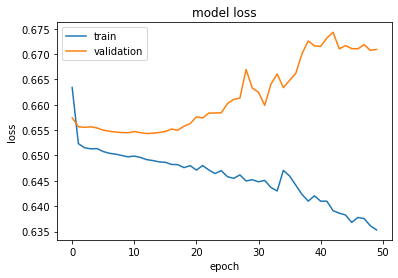

In [28]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.savefig("model_loss.png")
plt.show()

In [46]:
y_pred= model.predict([X_train1, X_train2])

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print('normal mse',sqrt(mean_squared_error(y_train, y_pred)))
print('normal mae',mean_absolute_error(y_train, y_pred))

normal mse 0.07815419061448536
normal mae 0.06041755866745869


In [48]:
y_test.shape
y_train=np.reshape(y_train, (y_train.shape[0],1))
y_pred=np.reshape(y_pred, (y_train.shape[0],1))
y_test_normalized=scaler_y.inverse_transform(y_train)
y_pred_normalized=scaler_y.inverse_transform(y_pred)
y_train=np.reshape(y_train, (y_train.shape[0],))
y_pred=np.reshape(y_pred, (y_train.shape[0],))
y_test_normalized=np.reshape(y_test_normalized, (y_train.shape[0],))
y_pred_normalized=np.reshape(y_pred_normalized, (y_train.shape[0],))
print('mse',sqrt(mean_squared_error(y_test_normalized, y_pred_normalized)))
print('mae',mean_absolute_error(y_test_normalized, y_pred_normalized))

mse 34.87414963156311
mae 26.959667281207754


In [49]:
y_train.shape

(1286,)

In [50]:
df_result=pd.DataFrame()

df_result['Normalized True Value']=y_train
df_result['Normalized Predicted Value']=y_pred
df_result['True Value']=y_test_normalized
df_result['Predicted Value']=y_pred_normalized

#df_result.to_csv('results_train.csv')

In [51]:
df_result

Normalized True Value  Normalized Predicted Value  True Value  \
0                  0.367462                    0.364977  748.106228   
1                  0.468499                    0.477334  793.191028   
2                  0.407228                    0.411520  765.850762   
3                  0.528786                    0.509460  820.092252   
4                  0.355952                    0.361606  742.969884   
...                     ...                         ...         ...   
1281               0.497785                    0.504682  806.259152   
1282               0.657246                    0.512966  877.414297   
1283               0.480203                    0.448209  798.413634   
1284               0.439937                    0.441929  780.446227   
1285               0.193691                    0.270390  670.565597   

      Predicted Value  
0          746.997070  
1          797.133423  
2          767.765747  
3          811.468872  
4          745.493103  
...               ...  
1281       809.336548  
1282       813.033325  
1283       784.137207  
1284       781.334900  
1285       704.790466  

[1286 rows x 4 columns]

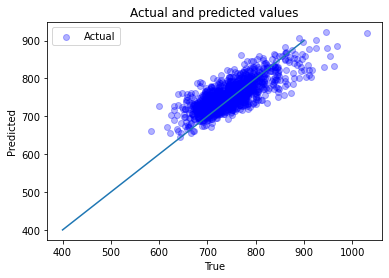

In [52]:
_, ax = plt.subplots()
x = [ 400, 500, 600, 700,800,900]
y = [400, 500, 600, 700,800,900]
ax.scatter(x = df_result['True Value'], y=df_result['Predicted Value'], c = 'blue', label = 'Actual', alpha = 0.3)
#ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)
plt.plot(x,y)
plt.title('Actual and predicted values')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.legend()
plt.savefig("actual_vs_predicted_train.png")
plt.show()


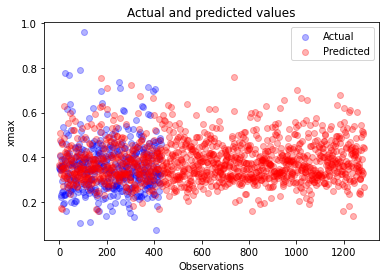

In [36]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('xmax')
plt.legend()
#plt.savefig("xmax_vs_observation_train.png")
plt.show()


In [53]:
y_pred= model.predict([X_test1, X_test2])

In [54]:
y_pred.shape

(429, 1)

In [55]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print('normal mse',sqrt(mean_squared_error(y_test, y_pred)))
print('normal mae',mean_absolute_error(y_test, y_pred))

normal mse 0.14102818816128274
normal mae 0.10938229190660502


In [56]:
y_test.shape
y_test=np.reshape(y_test, (y_test.shape[0],1))
y_pred=np.reshape(y_pred, (y_test.shape[0],1))
y_test_normalized=scaler_y.inverse_transform(y_test)
y_pred_normalized=scaler_y.inverse_transform(y_pred)
y_test=np.reshape(y_test, (y_test.shape[0],))
y_pred=np.reshape(y_pred, (y_test.shape[0],))
y_test_normalized=np.reshape(y_test_normalized, (y_test.shape[0],))
y_pred_normalized=np.reshape(y_pred_normalized, (y_test.shape[0],))

In [57]:
print('mse',sqrt(mean_squared_error(y_test_normalized, y_pred_normalized)))

mse 62.92993430454584


In [58]:
print('mae',mean_absolute_error(y_test_normalized, y_pred_normalized))

mae 48.80882665946332


In [59]:
df_result=pd.DataFrame()

df_result['Normalized True Value']=y_test
df_result['Normalized Predicted Value']=y_pred
df_result['True Value']=y_test_normalized
df_result['Predicted Value']=y_pred_normalized

#df_result.to_csv('results.csv')

In [60]:
#test.to_csv('test.csv')

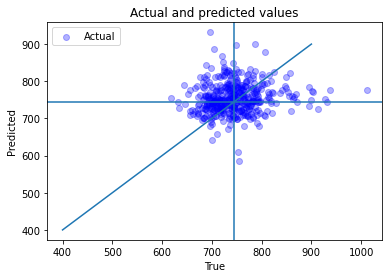

In [61]:
_, ax = plt.subplots()
x = [ 400, 500, 600, 700,800,900]
y = [400, 500, 600, 700,800,900]
ax.scatter(x = df_result['True Value'], y=df_result['Predicted Value'], c = 'blue', label = 'Actual', alpha = 0.3)
#ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.plot(x,y)
plt.axvline(df_result['True Value'].mean())
plt.axhline(df_result['True Value'].mean())
plt.title('Actual and predicted values')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.legend()
plt.savefig("actual_vs_predicted_test.png")
plt.show()


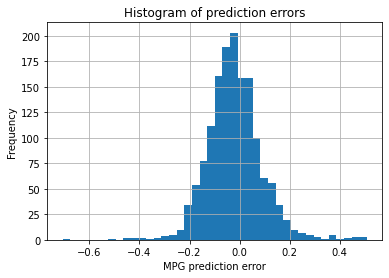

In [66]:
diff = df_result['True Value'] - df_result['Predicted Value']
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('MPG prediction error')
plt.ylabel('Frequency')
#plt.savefig('prediction_histogram.png')

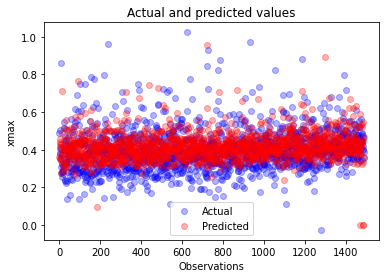

In [67]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('xmax')
plt.legend()
#plt.savefig("xmax_vs_observation.png")
plt.show()
